<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

Link to lesson video

https://youtu.be/L_SeVXKMjbw

In [1]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

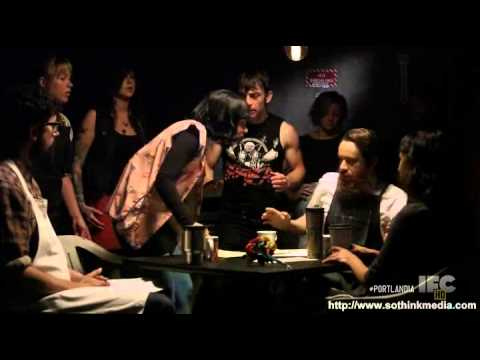

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'C:\\Users\\Samsung\\Google Drive (evidencen@evidencen.com)\\Data Science Lambda\\Unit 4_Machine Learning\\Natural Language Processing\\module1-text-data'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## Apply lemmetization first before further analysis. 

In [5]:
# checking if all reviews is from the same coffe shop

shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [6]:
# Start here 

# remove dates from full_review_text.
# Combine check-in with check-ins from full_review_text
# remove the number that appears after dates
# treat check-in as a stop word and remove it. 

shops.head(20)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


In [7]:
# preview of full_text_Review column
shops['full_review_text']


0        11/25/2016 1 check-in Love love loved the atm...
1        12/2/2016 Listed in Date Night: Austin, Ambia...
2        11/30/2016 1 check-in Listed in Brunch Spots ...
3        11/25/2016 Very cool decor! Good drinks Nice ...
4        12/3/2016 1 check-in They are located within ...
                              ...                        
7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, Length: 7616, dtype: object

In [8]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [9]:
# preview of star rating column

shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [10]:
shops['star_rating']

0        5.0 star rating 
1        4.0 star rating 
2        4.0 star rating 
3        2.0 star rating 
4        4.0 star rating 
              ...        
7611     4.0 star rating 
7612     5.0 star rating 
7613     4.0 star rating 
7614     3.0 star rating 
7615     4.0 star rating 
Name: star_rating, Length: 7616, dtype: object

## **use regex to only keep text from full_text_review**

## **use regex to only keep numbers from star_rating column**
 
## **tokenize full_text_review**

## **use lambda expression to combine check-in and check-ins**
 
## **add check in to stop words to remove**
 
## **make everything lower case**
 
## **start analysis**

In [11]:
import re

In [12]:
# creating a sample data. 

sample = shops['full_review_text'][0]
sample

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [13]:
# attempting to remove dates using regular expression. 
sample2 = re.sub('[^a-zA-Z ]', '', sample)
sample2

'   checkin Love love loved the atmosphere Every corner of the coffee shop had its own style and there were swings I ordered the matcha latte and it was muy fantastico Ordering and getting my drink were pretty streamlined I ordered on an iPad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system I got my latte within minutes  I was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be Any ideas '

In [14]:
# import spacy
import spacy
from spacy.tokenizer import Tokenizer

In [15]:
# attempting to tokenize the text using spacy

# instantiating spacy. 
# en_core_web_lg = language spacy should use for tokenization

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [16]:
# tokenizing sample

[token.text for token in tokenizer(sample2)]

['   ',
 'checkin',
 'Love',
 'love',
 'loved',
 'the',
 'atmosphere',
 'Every',
 'corner',
 'of',
 'the',
 'coffee',
 'shop',
 'had',
 'its',
 'own',
 'style',
 'and',
 'there',
 'were',
 'swings',
 'I',
 'ordered',
 'the',
 'matcha',
 'latte',
 'and',
 'it',
 'was',
 'muy',
 'fantastico',
 'Ordering',
 'and',
 'getting',
 'my',
 'drink',
 'were',
 'pretty',
 'streamlined',
 'I',
 'ordered',
 'on',
 'an',
 'iPad',
 'which',
 'included',
 'all',
 'beverage',
 'selections',
 'that',
 'ranged',
 'from',
 'coffee',
 'to',
 'wine',
 'desired',
 'level',
 'of',
 'sweetness',
 'and',
 'a',
 'checkout',
 'system',
 'I',
 'got',
 'my',
 'latte',
 'within',
 'minutes',
 ' ',
 'I',
 'was',
 'hoping',
 'for',
 'a',
 'typical',
 'heart',
 'or',
 'feather',
 'on',
 'my',
 'latte',
 'but',
 'found',
 'myself',
 'listing',
 'out',
 'all',
 'the',
 'possibilities',
 'of',
 'what',
 'the',
 'art',
 'may',
 'be',
 'Any',
 'ideas']

## How tokenization works. 

What is tokenization - https://spacy.io/usage/linguistic-features#tokenization

What is a doc - https://spacy.io/api/doc

What is a token - https://spacy.io/api/token

What is a vocab - https://spacy.io/api/vocab

In [17]:
# now apply this regex and tokenization to entire column of full_text_reviews. 

# a doc is a collection of tokens. each line is a doc. 
# a token is words, numbers, punctuation. 

result = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    # tokenizing each doc. 
    doc_token = [token.text for token in doc]
    result.append(doc_token)
    

shops['review_tokens'] = result
shops['review_tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: review_tokens, dtype: object

In [18]:
# now use regex to find dates, numbers, dollar symbols and remove them. 

# how to use regex to find dates
date_sample = shops['review_tokens'][0]
re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', sample)

['11/25/2016']

In [19]:
# see if I can repeat the regex above that removes dates, 
# but apply it to the entire column

no_dates = [re.sub('[^a-zA-Z ]', '', text) for text in shops['full_review_text']]

In [20]:
# now create a new column that has same 
# information as full_review_text but with no nates

shops['no_dates'] = no_dates
shops['no_dates'].head()

0       checkin Love love loved the atmosphere Ever...
1      Listed in Date Night Austin Ambiance in Aust...
2       checkin Listed in Brunch Spots I loved the ...
3      Very cool decor Good drinks Nice seating  Ho...
4       checkin They are located within the Northcr...
Name: no_dates, dtype: object

In [21]:
# now repeat the tokenization step above and the result
# should be what we want without the dates. Let's see

result2 = []
for doc in tokenizer.pipe(shops['no_dates'], batch_size=500):
    # tokenizing each doc. 
    doc_token = [token.text for token in doc]
    result2.append(doc_token)
    

shops['review_tokens2'] = result2
shops['review_tokens2'].head()

0    [   , checkin, Love, love, loved, the, atmosph...
1    [  , Listed, in, Date, Night, Austin, Ambiance...
2    [   , checkin, Listed, in, Brunch, Spots, I, l...
3    [  , Very, cool, decor, Good, drinks, Nice, se...
4    [   , checkin, They, are, located, within, the...
Name: review_tokens2, dtype: object

In [22]:
# add checkin and checkins to stop words

stop_words = nlp.Defaults.stop_words.union(['shop','coffee', 'place','im','checkin', 'checkins', "  ", "   ", "$", ' '])

## Apply tokenization to the column that has the dates removed, then remove stop words, then make it lower case, then create a new column to store that information. 

In [23]:
# to get rid of the white space in front, 
# i could remove the first index of everything in the list
# or I could add double and tripple white spaces to stop words. 
# adding double and tripple white space to stop words might be the better version
# because I don't know the information located on the first index of every
# line/text/list of tokens. First index of every doc is unknown. 

# unpon further examination, putting spaces in stop words is the better option since
# double and triple white spaces are located in other places within the doc. 

# no punction in review_tokens 2 because they where taken out by the regex substitution


results3 = []

for doc in tokenizer.pipe(shops['no_dates'], batch_size=500):
    doc_tokens = [] 
    
    for token in doc:
        if token.text.lower() not in stop_words:
            doc_tokens.append(token.text.lower())
            
    results3.append(doc_tokens)
    
shops['review_tokens3'] = results3
shops['review_tokens3'].head()

0    [love, love, loved, atmosphere, corner, shop, ...
1    [listed, date, night, austin, ambiance, austin...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor, good, drinks, nice, seating, ove...
4    [located, northcross, mall, shopping, center, ...
Name: review_tokens3, dtype: object

# now remove "star rating" from star rating column

In [24]:
star_sample = shops['star_rating'][0]
star_sample

' 5.0 star rating '

In [25]:
# I can remove the star rating words as well as preceding and proceding spaces by 
# dropping them or I can just create a regex that only contains numbers

re.sub('[^1-9]',"",star_sample)

'5'

In [26]:
rating = [re.sub('[^1-9]',"",star_sample) for star_sample in shops['star_rating']]

shops['rating'] = rating

In [27]:
shops['rating'].head()

0    5
1    4
2    4
3    2
4    4
Name: rating, dtype: object

In [28]:
shops.dtypes

# rating column is an object although I could cast it into an integer. 


coffee_shop_name    object
full_review_text    object
star_rating         object
review_tokens       object
no_dates            object
review_tokens2      object
review_tokens3      object
rating              object
dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [29]:
shops['review_tokens3'][0]

['love',
 'love',
 'loved',
 'atmosphere',
 'corner',
 'shop',
 'style',
 'swings',
 'ordered',
 'matcha',
 'latte',
 'muy',
 'fantastico',
 'ordering',
 'getting',
 'drink',
 'pretty',
 'streamlined',
 'ordered',
 'ipad',
 'included',
 'beverage',
 'selections',
 'ranged',
 'wine',
 'desired',
 'level',
 'sweetness',
 'checkout',
 'system',
 'got',
 'latte',
 'minutes',
 'hoping',
 'typical',
 'heart',
 'feather',
 'latte',
 'found',
 'listing',
 'possibilities',
 'art',
 'ideas']

In [30]:
# overall word count and token count

# count the number of words in review_tokens3

# count the number of words in review_tokens3 based on the number of ratings. 

#  A counter is a container that stores elements as dictionary keys, 
# and their counts are stored as dictionary values.

# https://www.hackerrank.com/challenges/collections-counter/problem

# word count in review_tokens3 for a single row

count = Counter(shops['review_tokens3'][0])

count

Counter({'love': 2,
         'loved': 1,
         'atmosphere': 1,
         'corner': 1,
         'shop': 1,
         'style': 1,
         'swings': 1,
         'ordered': 2,
         'matcha': 1,
         'latte': 3,
         'muy': 1,
         'fantastico': 1,
         'ordering': 1,
         'getting': 1,
         'drink': 1,
         'pretty': 1,
         'streamlined': 1,
         'ipad': 1,
         'included': 1,
         'beverage': 1,
         'selections': 1,
         'ranged': 1,
         'wine': 1,
         'desired': 1,
         'level': 1,
         'sweetness': 1,
         'checkout': 1,
         'system': 1,
         'got': 1,
         'minutes': 1,
         'hoping': 1,
         'typical': 1,
         'heart': 1,
         'feather': 1,
         'found': 1,
         'listing': 1,
         'possibilities': 1,
         'art': 1,
         'ideas': 1})

In [31]:
# casting the "count" result into a dictionary
a = dict(count)

# casting the "a" into a list so that I can index it and obtain only
# a subset of the data if needed

b = list(a.items())

b[:10]

[('love', 2),
 ('loved', 1),
 ('atmosphere', 1),
 ('corner', 1),
 ('shop', 1),
 ('style', 1),
 ('swings', 1),
 ('ordered', 2),
 ('matcha', 1),
 ('latte', 3)]

In [32]:
#  A counter is a container that stores elements as dictionary keys, 
# and their counts are stored as dictionary values.

# word count in review_tokens3 for a single row

# count = Counter(shops['review_tokens3'][0])

# I figured out how to use counter for a single row
# Now, I need to figure out how to use counter to 
# count each row in a column

# instantiate the counter function
review_count = Counter()

# count each word(token) in each doc(list of tokens = each row) 
# in the review_tokens column
# then update the counter above

shops['review_tokens3'].apply(lambda tokens: review_count.update(tokens))

# how to interprete the code above.
# apply to shops['review_tokens3'] the following function
# the function being used is a lambda function
# tokens = argument for lambda function
# tokens = individual words being counted from the shops['review_tokens3'] column
# review_count.update(tokens) = the expression for the lambda function
# update the number of counts stored in review_count

review_count.most_common(10)


[('good', 3973),
 ('great', 3919),
 ('like', 3088),
 ('austin', 2252),
 ('love', 1935),
 ('time', 1884),
 ('food', 1836),
 ('nice', 1741),
 ('shop', 1680),
 ('friendly', 1659)]

In [33]:
# casting the result of review_count into a dictionary
c = dict(review_count)

# casting the "c" into a list so that I can index it and obtain only
# a subset of the data if needed

d = list(c.items())

d[:10]

[('love', 1935),
 ('loved', 366),
 ('atmosphere', 969),
 ('corner', 163),
 ('shop', 1680),
 ('style', 101),
 ('swings', 65),
 ('ordered', 941),
 ('matcha', 189),
 ('latte', 1615)]

In [34]:
shops.columns

Index(['coffee_shop_name', 'full_review_text', 'star_rating', 'review_tokens',
       'no_dates', 'review_tokens2', 'review_tokens3', 'rating'],
      dtype='object')

In [35]:

"""
Failed Experiment

if (shops['rating'] == "4") | (shops['rating'] == "5"):
    shops['review_tokens3'].apply(lambda tokens: good_review_count.update(tokens))
else:
    shops['review_tokens3'].apply(lambda tokens: bad_review_count.update(tokens))"""

'\nFailed Experiment\n\nif (shops[\'rating\'] == "4") | (shops[\'rating\'] == "5"):\n    shops[\'review_tokens3\'].apply(lambda tokens: good_review_count.update(tokens))\nelse:\n    shops[\'review_tokens3\'].apply(lambda tokens: bad_review_count.update(tokens))'

In [36]:
# cast rating column into an integer to make it easier to use it as logic

shops['rating'] = pd.to_numeric(shops['rating'])

In [37]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
review_tokens       object
no_dates            object
review_tokens2      object
review_tokens3      object
rating               int64
dtype: object

In [38]:
# count the number of words in review_tokens3 based on the number of ratings. 

# create 2 results, one for words that appear for "good review" 
# and another for words that appear in  "bad reveiws"

# create a new dataframe that just contains bad reviews

# create a new dataframe that just contains good reviews

# bad reviews dataframe
bad_reviews = shops[shops['rating'] <= 3]

# good reviews dataframe
good_reviews = shops[shops['rating'] >= 4]

In [39]:
# bad review words
bad_review_count = Counter()

bad_reviews['review_tokens3'].apply(lambda tokens: bad_review_count.update(tokens))

bad_review_count.most_common(10)

[('good', 877),
 ('like', 876),
 ('food', 484),
 ('time', 478),
 ('great', 466),
 ('dont', 449),
 ('service', 445),
 ('people', 375),
 ('pretty', 363),
 ('nice', 346)]

In [40]:
# good review words. 

good_review_count = Counter()

good_reviews['review_tokens3'].apply(lambda tokens: good_review_count.update(tokens))

good_review_count.most_common(10)

[('great', 3453),
 ('good', 3096),
 ('like', 2212),
 ('austin', 1969),
 ('love', 1725),
 ('friendly', 1462),
 ('time', 1406),
 ('nice', 1395),
 ('shop', 1370),
 ('food', 1352)]

In [41]:
# create a new dataframe that has 

# good review words and their count

# bad review words and their count

# good review words and their percentage of total

# bad review workds and their percentage of total. 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [42]:
# a dataframe that puts good words review count in dataframe

gd = zip(good_review_count.keys(), good_review_count.values())

good = pd.DataFrame(gd, columns = ["good_reviews", "good_count"])

good.head()

,good_reviews,good_count
0,love,1725
1,loved,330
2,atmosphere,810
3,corner,131
4,shop,1370


In [43]:
# a dataframe that puts good words review count in dataframe

bd = zip(bad_review_count.keys(), bad_review_count.values())

bad = pd.DataFrame(bd, columns = ["bad_reviews", "bad_count"])

bad.head()

,bad_reviews,bad_count
0,cool,165
1,decor,64
2,good,877
3,drinks,263
4,nice,346


In [44]:
# merge good and bad dataframes

goodVbad = pd.merge(good, bad, left_on = "good_reviews", 
                    right_on = "bad_reviews").drop(columns = "bad_reviews")

print(goodVbad.shape)
goodVbad.head()

(6243, 3)


,good_reviews,good_count,bad_count
0,love,1725,210
1,loved,330,36
2,atmosphere,810,159
3,corner,131,32
4,shop,1370,310


In [55]:
# what percent of these words appeared in good reviews

# what percent of these words appeard in bad reviews

# doc_appear_count= how many documents/reviews does each word appear in
    
# all_docs = list of all of the tokens in our reviews
    
# each_review = each individual review
    
# rank shows you what is it the most common, least common, e.t.c
    
# total_pct = what percentage of the document set does this word
# represent. 

# set(doc/each_review) = the entire document set as opposed to 
# individual documents

"""# building a dataframe that shows the count of this word, the
# percentage of this word in the entire document, and the 
# cumulative percentage of this word. And also doing the same
# frequency calculations for how many times the word appears 
# in the document set. 
"""

word_count = Counter()

doc_appear = Counter()

for each_review in shops['review_tokens3']:
    word_count.update(each_review)
    doc_appear.update(set(each_review))
    
combo = zip(word_count.keys(), word_count.values())

df = pd.DataFrame(combo, columns = ['words', 'count'])

df['word_rank'] = df['count'].rank(method='first', ascending=False)

total = df['count'].sum()

df["total_pct"] = df['count'].apply(lambda x: x/total)

df['cumulative_pct'] = df['total_pct'].cumsum()

# how many times does each word appear in the entire document as 
# opposed to individual reviews

appear = pd.DataFrame(zip(doc_appear.keys(), doc_appear.values()), 
                      columns = ['words', 'doc_appear_cnt'])

total_docs = len(shops['review_tokens3'])

appear['appear_pct'] = appear['doc_appear_cnt'].apply(lambda x : x/total_docs)

df = df.merge(appear, on='words')

df = df.sort_values(by='word_rank')

df.head(10)

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
141,good,3973,1.0,0.011677,0.157233,2788,0.366071
127,great,3919,2.0,0.011518,0.137488,2836,0.372374
164,like,3088,3.0,0.009076,0.188340,2124,0.278887
42,austin,2252,4.0,0.006619,0.052321,1788,0.234769
0,love,1935,5.0,0.005687,0.005687,1500,0.196954
489,time,1884,6.0,0.005537,0.383477,1469,0.192883
365,food,1836,7.0,0.005396,0.311315,1365,0.179228
57,nice,1741,8.0,0.005117,0.066058,1463,0.192096
4,shop,1680,9.0,0.004938,0.015027,1331,0.174764
180,friendly,1659,10.0,0.004876,0.197377,1577,0.207064


In [56]:
# turn the code above into a function so that I can use it for 
# good reviews and bad reviews. 

def word_frequency(doc_column):
    # what percent of these words appeared in good reviews

    # what percent of these words appeard in bad reviews

    # doc_appear_count= how many documents/reviews does each word appear in

    # all_docs = list of all of the tokens in our reviews

    # each_review = each individual review

    # rank shows you what is it the most common, least common, e.t.c

    # total_pct = what percentage of the document set does this word
    # represent. 

    # set(doc/each_review) = the entire document set as opposed to 
    # individual documents

    """# building a dataframe that shows the count of this word, the
    # percentage of this word in the entire document, and the 
    # cumulative percentage of this word. And also doing the same
    # frequency calculations for how many times the word appears 
    # in the document set. 
    """

    word_count = Counter()

    doc_appear = Counter()

    for each_review in doc_column:
        word_count.update(each_review)
        doc_appear.update(set(each_review))

    combo = zip(word_count.keys(), word_count.values())

    df = pd.DataFrame(combo, columns = ['words', 'count'])

    df['word_rank'] = df['count'].rank(method='first', ascending=False)

    total = df['count'].sum()

    df["total_pct"] = df['count'].apply(lambda x: x/total)

    df['cumulative_pct'] = df['total_pct'].cumsum()

    # how many times does each word appear in the entire document as 
    # opposed to individual reviews

    appear = pd.DataFrame(zip(doc_appear.keys(), doc_appear.values()), 
                          columns = ['words', 'doc_appear_cnt'])

    total_docs = len(doc_column)

    appear['appear_pct'] = appear['doc_appear_cnt'].apply(lambda x : x/total_docs)

    df = df.merge(appear, on='words')

    df = df.sort_values(by='word_rank')

    return df

In [58]:
# word frequency analysis for all reviews

all_reviews = word_frequency(shops['review_tokens3'])

all_reviews.head()

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
141,good,3973,1.0,0.011677,0.157233,2788,0.366071
127,great,3919,2.0,0.011518,0.137488,2836,0.372374
164,like,3088,3.0,0.009076,0.188340,2124,0.278887
42,austin,2252,4.0,0.006619,0.052321,1788,0.234769
0,love,1935,5.0,0.005687,0.005687,1500,0.196954


In [59]:
# word frequency analysis for good reviews

good_freq = word_frequency(good_reviews['review_tokens3'])

good_freq.head()

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
127,great,3453,1.0,0.013024,0.142513,2492,0.405863
193,good,3096,2.0,0.011677,0.205395,2192,0.357003
200,like,2212,3.0,0.008343,0.219339,1559,0.253909
42,austin,1969,4.0,0.007426,0.053811,1547,0.251954
0,love,1725,5.0,0.006506,0.006506,1322,0.215309


In [60]:
# word frequency analysis for bad reviews

bad_freq = word_frequency(bad_reviews['review_tokens3'])

bad_freq.head()

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
2,good,877,1.0,0.011676,0.014724,596,0.403794
29,like,876,2.0,0.011662,0.065168,565,0.382791
51,food,484,3.0,0.006444,0.087334,310,0.210027
183,time,478,4.0,0.006364,0.205488,353,0.239160
61,great,466,5.0,0.006204,0.105413,344,0.233062


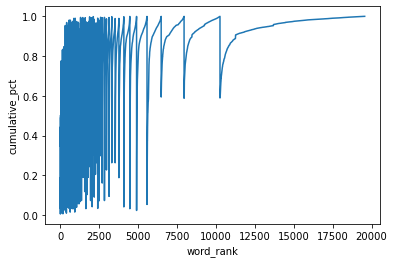

In [61]:
# cumulative distribution plot

sns.lineplot(x='word_rank', y='cumulative_pct', data=all_reviews)

<function matplotlib.pyplot.show(*args, **kw)>

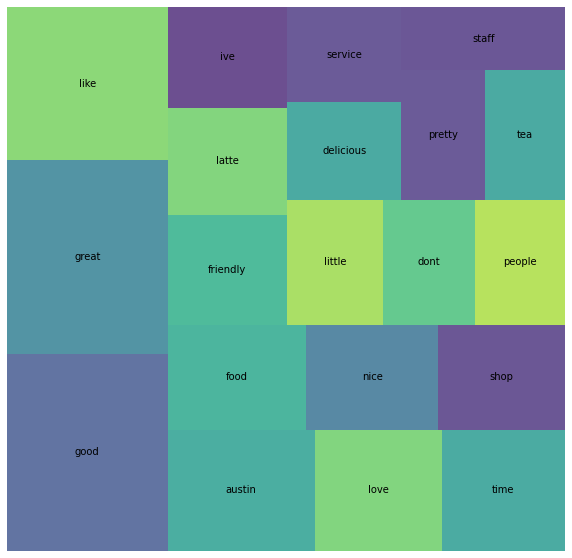

In [66]:
# top 20 words for all reviews

reviews_top20 = df[df['word_rank'] <= 20]

reviews_top20

plt.figure(figsize = (10,10))
squarify.plot(sizes=reviews_top20['total_pct'], 
              label=reviews_top20['words'], 
             alpha = 0.8)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

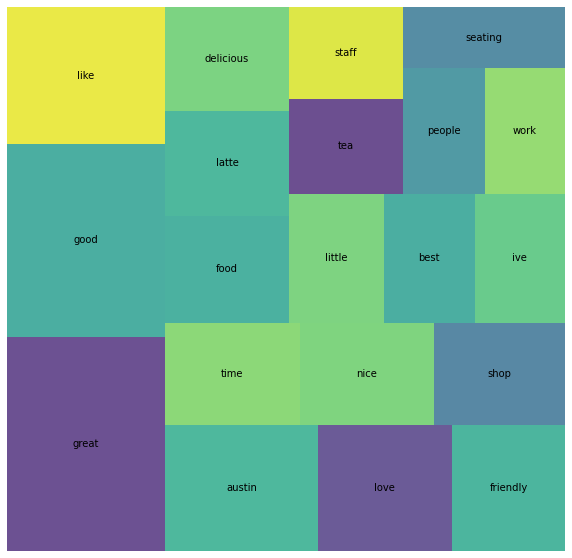

In [67]:
# top 20 words for good reviews

good_top20 = good_freq[good_freq['word_rank'] <= 20]

good_top20

plt.figure(figsize = (10,10))
squarify.plot(sizes=good_top20['total_pct'], 
              label=good_top20['words'], 
             alpha = 0.8)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

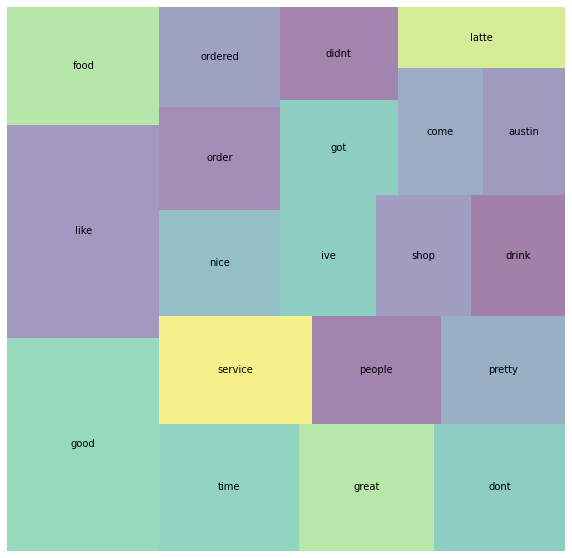

In [70]:
# top 20 words for bad reviews

bad_top20 = bad_freq[bad_freq['word_rank'] <= 20]

bad_top20

plt.figure(figsize = (10,10))
squarify.plot(sizes=bad_top20['total_pct'], 
              label=bad_top20['words'], 
             alpha = 0.5)
plt.axis('off')
plt.show

In [74]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,no_dates,review_tokens2,review_tokens3,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved...",checkin Love love loved the atmosphere Ever...,"[ , checkin, Love, love, loved, the, atmosph...","[love, love, loved, atmosphere, corner, shop, ...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...",Listed in Date Night Austin Ambiance in Aust...,"[ , Listed, in, Date, Night, Austin, Ambiance...","[listed, date, night, austin, ambiance, austin...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",checkin Listed in Brunch Spots I loved the ...,"[ , checkin, Listed, in, Brunch, Spots, I, l...","[listed, brunch, spots, loved, eclectic, homey...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin...",Very cool decor Good drinks Nice seating Ho...,"[ , Very, cool, decor, Good, drinks, Nice, se...","[cool, decor, good, drinks, nice, seating, ove...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located...",checkin They are located within the Northcr...,"[ , checkin, They, are, located, within, the...","[located, northcross, mall, shopping, center, ...",4


In [82]:
# using and applying lemmetization to my corpus of text. 

sample6 = shops['no_dates'][0]

nlp = spacy.load("en_core_web_lg")
text = nlp(sample6)

for token in text:
    print(token.text, "  ", token.lemma_)

          
checkin    checkin
Love    Love
love    love
loved    love
the    the
atmosphere    atmosphere
Every    every
corner    corner
of    of
the    the
coffee    coffee
shop    shop
had    have
its    -PRON-
own    own
style    style
and    and
there    there
were    be
swings    swing
I    -PRON-
ordered    order
the    the
matcha    matcha
latte    latte
and    and
it    -PRON-
was    be
muy    muy
fantastico    fantastico
Ordering    order
and    and
getting    get
my    -PRON-
drink    drink
were    be
pretty    pretty
streamlined    streamlined
I    -PRON-
ordered    order
on    on
an    an
iPad    iPad
which    which
included    include
all    all
beverage    beverage
selections    selection
that    that
ranged    range
from    from
coffee    coffee
to    to
wine    wine
desired    desire
level    level
of    of
sweetness    sweetness
and    and
a    a
checkout    checkout
system    system
I    -PRON-
got    get
my    -PRON-
latte    latte
within    within
minutes    minute

In [80]:
# function for getting lemmas of a doc

def lemma(docs):
    
    text = nlp(docs)
    
    lemmas = []
    
    for token in text:
        if ((token.is_stop == False) and 
            (token.is_punct == False)) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_)
    return lemmas

In [83]:
# create a new column in our dataset that contains the lemmetized words. 

# take this column to the top of the notebook during refactoring 
# so that subsequent analysis will use lemmetized version of the document. 

# docs = shops['no_dates']

# instead of calling the function then passing in docs,

# we define docs first, then apply the function to it

shops['lemmas'] = shops['no_dates'].apply(lemma)
shops['lemmas'].head()

0    [   , checkin, Love, love, love, atmosphere, c...
1    [  , list, Date, Night, Austin, Ambiance, Aust...
2    [   , checkin, list, Brunch, Spots, love, ecle...
3    [  , cool, decor, good, drink, nice, seating, ...
4    [   , checkin, locate, Northcross, mall, shopp...
Name: lemmas, dtype: object

In [85]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,no_dates,review_tokens2,review_tokens3,rating,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved...",checkin Love love loved the atmosphere Ever...,"[ , checkin, Love, love, loved, the, atmosph...","[love, love, loved, atmosphere, corner, shop, ...",5,"[ , checkin, Love, love, love, atmosphere, c..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...",Listed in Date Night Austin Ambiance in Aust...,"[ , Listed, in, Date, Night, Austin, Ambiance...","[listed, date, night, austin, ambiance, austin...",4,"[ , list, Date, Night, Austin, Ambiance, Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",checkin Listed in Brunch Spots I loved the ...,"[ , checkin, Listed, in, Brunch, Spots, I, l...","[listed, brunch, spots, loved, eclectic, homey...",4,"[ , checkin, list, Brunch, Spots, love, ecle..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin...",Very cool decor Good drinks Nice seating Ho...,"[ , Very, cool, decor, Good, drinks, Nice, se...","[cool, decor, good, drinks, nice, seating, ove...",2,"[ , cool, decor, good, drink, nice, seating, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located...",checkin They are located within the Northcr...,"[ , checkin, They, are, located, within, the...","[located, northcross, mall, shopping, center, ...",4,"[ , checkin, locate, Northcross, mall, shopp..."


In [84]:
import scattertext as st

In [94]:
shops['category'] = ['good_review' if (x is 4) | (x is 5) else 'bad_review' 
                     for x in shops['rating']]

In [95]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,no_dates,review_tokens2,review_tokens3,rating,lemmas,category
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved...",checkin Love love loved the atmosphere Ever...,"[ , checkin, Love, love, loved, the, atmosph...","[love, love, loved, atmosphere, corner, shop, ...",5,"[ , checkin, Love, love, love, atmosphere, c...",good_review
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...",Listed in Date Night Austin Ambiance in Aust...,"[ , Listed, in, Date, Night, Austin, Ambiance...","[listed, date, night, austin, ambiance, austin...",4,"[ , list, Date, Night, Austin, Ambiance, Aust...",good_review
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",checkin Listed in Brunch Spots I loved the ...,"[ , checkin, Listed, in, Brunch, Spots, I, l...","[listed, brunch, spots, loved, eclectic, homey...",4,"[ , checkin, list, Brunch, Spots, love, ecle...",good_review
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin...",Very cool decor Good drinks Nice seating Ho...,"[ , Very, cool, decor, Good, drinks, Nice, se...","[cool, decor, good, drinks, nice, seating, ove...",2,"[ , cool, decor, good, drink, nice, seating, ...",bad_review
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located...",checkin They are located within the Northcr...,"[ , checkin, They, are, located, within, the...","[located, northcross, mall, shopping, center, ...",4,"[ , checkin, locate, Northcross, mall, shopp...",good_review


In [96]:
# getting this information in html format

corpus = st.CorpusFromPandas(shops, 
                             category_col='category', 
                             text_col='no_dates',
                             nlp=nlp).build()

html = st.produce_scattertext_explorer(
    corpus, 
    category='good_review',
    category_name='good_review',
    not_category_name='bad_review',
    width_in_pixels=1000)
open('./shop_reviews', 'w').write(html)

6237640

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

